In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Open your data file
df = pd.read_csv('../../data/fortnite_players_stats.csv')

In [11]:
# Get a quick summary of numerical data
print(df.describe())

         Solo score    Solo top1      Solo kd  Solo winRatio  Solo matches  \
count  1.435000e+03  1435.000000  1435.000000    1435.000000   1435.000000   
mean   1.088202e+06   328.909408     1.816300       4.853937   6911.060627   
std    8.872639e+05   529.192568     1.156026       5.330249   5408.219523   
min    4.453000e+03     0.000000     0.080000       0.000000     30.000000   
25%    4.355170e+05    65.500000     1.050000       1.600000   2875.000000   
50%    9.070010e+05   162.000000     1.480000       2.900000   5728.000000   
75%    1.506555e+06   366.000000     2.200000       6.100000   9585.000000   
max    6.772116e+06  6480.000000     9.600000      44.100000  36487.000000   

         Solo kills  Solo minutesPlayed    Duos score    Duos top1  \
count   1435.000000         1435.000000  1.435000e+03  1435.000000   
mean   11781.843206        43517.135889  1.397810e+06   836.602787   
std    11417.340071        36314.877771  9.805693e+05   727.366968   
min       28.0000

In [12]:
df['Solo kd'].describe()

count    1435.000000
mean        1.816300
std         1.156026
min         0.080000
25%         1.050000
50%         1.480000
75%         2.200000
max         9.600000
Name: Solo kd, dtype: float64

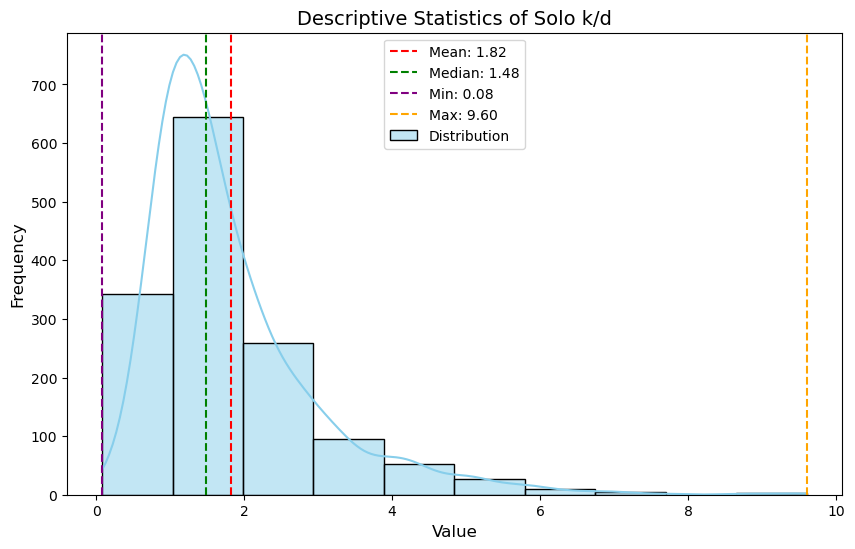

In [4]:
# Calculate descriptive statistics
desc_stats = df['Solo kd'].describe()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Solo kd'], kde=True, bins=10, color='skyblue', label='Distribution')
plt.axvline(desc_stats['mean'], color='red', linestyle='--', label=f"Mean: {desc_stats['mean']:.2f}")
plt.axvline(desc_stats['50%'], color='green', linestyle='--', label=f"Median: {desc_stats['50%']:.2f}")
plt.axvline(desc_stats['min'], color='purple', linestyle='--', label=f"Min: {desc_stats['min']:.2f}")
plt.axvline(desc_stats['max'], color='orange', linestyle='--', label=f"Max: {desc_stats['max']:.2f}")

# Add labels and legend
plt.title('Descriptive Statistics of Solo k/d', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Creating new variables

All of the variables in this dataset are numeric. Let's find out which kind of Fortnite game mode the players play most often so we have an example categorical variable.


In [13]:
# 1. Select the columns to compare.
score_columns = ['Solo matches', 'Duos matches', 'Trios matches', 'Squads matches']

# 2. Use idxmax(axis=1) to find the column name with the maximum value for each row.
# This directly gives us the label we want for our categorical variable.
df['most_played_mode'] = df[score_columns].idxmax(axis=1)

# 3. Recode to remove "matches" from the label
recoding_dict = {
    'Solo matches': 'Solo',
    'Duos matches': 'Duos',
    'Trios matches': 'Trios',
    'Squads matches': 'Squads'
}

df['most_played_mode'] = df['most_played_mode'].replace(recoding_dict)

In [5]:
# Get the value counts for a categorical column
print(df['most_played_mode'].value_counts())

most_played_mode
Duos      622
Solo      512
Squads    300
Trios       1
Name: count, dtype: int64


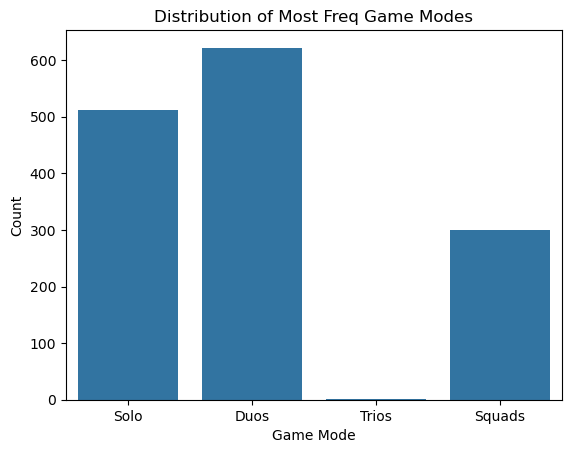

In [6]:
# Visualize those value counts
# Define the desired order of the categories
custom_order = ['Solo', 'Duos', 'Trios', 'Squads']

# Create a count plot (histogram for categorical data) and specify the order
sns.countplot(data=df, x='most_played_mode', order=custom_order)

# Set the title and labels for clarity
plt.title('Distribution of Most Freq Game Modes')
plt.xlabel('Game Mode')
plt.ylabel('Count')

# Display the plot
plt.show()

In [7]:
df['most_played_mode'].describe()

count     1435
unique       4
top       Duos
freq       622
Name: most_played_mode, dtype: object

In [15]:
# Save that data for the next step
df.to_csv('../../data/fortnite_players_stats_updated.csv', index=False)